$\Large\textbf{Lab 5.} \large\textbf{Exercise 1.}$



In the last few labs, we have been discussing about gradient descent and Newton's methods to solve problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. We discussed the importance of scaling the direction along which the descent step is taken during the update. This scaling helped in better conditioning of the problem. Further we noticed that Newton's method might be fast in most cases when compared to gradient descent. This feature of Newton's method is attractive but is available only under certain assumptions. 


In the implementation of Newton's method, we noticed that the inverse of Hessian is required at each iteration. 

Consider the problem $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top \mathbf{A} \mathbf{x}$ where $A$ is a $n \times n$ symmetric positive definite matrix. 

Note that $\nabla^2 f(\mathbf{x}) = \mathbf{A}$.  We will now investigate the computational effort needed to compute the inverse of the Hessian matrix $A$ for large $n$ values. 

First let us create a useful candidate for $\mathbf{A}$. Then we will check the time taken to compute the inverse of matrix $\mathbf{A}$.

In [ ]:
#code for creating a random positive definite matrix 
#we will first import the numpy package and name it as np
 
import numpy as np 
#create a random nxn matrix 
n = 100
B = np.random.rand(n, n)
A = np.matmul(B,B.T) #Note: This construction ensures that A is symmetric
A = np.add(A, 0.001*np.identity(n)) #this diagonal perturbation helps to make the matrix positive definite 
 
#check if A is in fact symmetric positive definite 
print('Is A symmetric? Answer:', np.sum(np.sum(np.subtract(A,A.T))) == 0 )
print('Is A positive definite? Answer:', np.amin(np.linalg.eigvalsh(A))>0 )

Is A symmetric? Answer: True
Is A positive definite? Answer: True


In [ ]:
#Let us now check the time taken for computing the inverse of matrix A
from timeit import default_timer as timer
start_time = timer()
A_inv = np.linalg.inv(A)
end_time = timer()
print('Time taken to compute inverse of A:',end_time - start_time)

Time taken to compute inverse of A: 0.007885345999994797


$\large\textbf{2. Question:}$ Choose $n \in \{500,1000,2500,5000,7500,10000\}$ and find the time taken to compute the inverse of $\mathbf{A}$ for each possible value of $n$. Comment on your observations. Do you observe similar trends in the time taken to test the positive definiteness of $\mathbf{A}$ ? Comment and provide appropriate reasons for your observations. 


$\large\textbf{Answer:}$

In [ ]:
n_list = [500,1000,2500,5000,7500,10000]  # list of different values of n.
B_list = [np.random.rand(p, p) for p in n_list]
A_list = [np.matmul(B,B.T) for B in B_list]       #list of symmetric matrices
positive_def_list = [np.add(A, 0.001*np.identity(A.shape[0])) for A in A_list]
 
for A in positive_def_list:
  start_time = timer()
  A_inv = np.linalg.inv(A)
  end_time = timer()
  print('For n = ', A.shape[0],',  time taken to compute the inverse of A: ',end_time - start_time)
  
  start_time = timer()
  np.amin(np.linalg.eigvalsh(A))
  end_time = timer()
  print('For n = ', A.shape[0],',  time taken to test the positive definiteness of A: ',end_time - start_time)
  print()

For n =  500 ,  time taken to compute the inverse of A:  0.022161110000013196
For n =  500 ,  time taken to test the positive definiteness of A:  0.026905629999987468

For n =  1000 ,  time taken to compute the inverse of A:  0.12242733000002204
For n =  1000 ,  time taken to test the positive definiteness of A:  0.16844822999999565

For n =  2500 ,  time taken to compute the inverse of A:  1.3941281500000002
For n =  2500 ,  time taken to test the positive definiteness of A:  3.2497779889999947

For n =  5000 ,  time taken to compute the inverse of A:  10.356504237999985
For n =  5000 ,  time taken to test the positive definiteness of A:  25.04987238800001

For n =  7500 ,  time taken to compute the inverse of A:  33.87698304599999
For n =  7500 ,  time taken to test the positive definiteness of A:  79.58071110200001

For n =  10000 ,  time taken to compute the inverse of A:  81.54617376499999
For n =  10000 ,  time taken to test the positive definiteness of A:  187.88416792800007



**COMMENTS ON OBSERVATIONS:** \
1. From the above output it is clear that the time taken to compute the Inverse of matrix $A$ is less in comparison to the time taken to test the positive definiteness of matrix $A$.
2. For increasing values of $n$, the time taken to compute the inverse and the time taken to test the positive definiteness of matrix $A$ also increases.

However if we use Newton's method to solve $\min_{\mathbf{x} \in {\mathbb{R}}^n} 0.5 \mathbf{x}^\top \mathbf{A}\mathbf{x}$ then the inverse of the Hessian remains invariant to the iterates $\mathbf{x}^k$ and hence can be computed once for all iterations. The situation becomes worse when the inverse of the Hessian needs to be computed afresh at every iteration. 

To demonstrate this fact, let us try to use Newton's method to solve the problem $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ where $f(\mathbf{x})=f(x_1,x_2,\ldots,x_n) = \sum_{i=1}^{n-1} \left [2(x_i^2 - x_{i+1})^2 + (x_i-1)^2) \right ]$.



$\large\textbf{4. Question:}$

Implement Newton's method to solve the problem $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ where $f(\mathbf{x})=f(x_1,x_2,\ldots,x_n) = \sum_{i=1}^{n-1} \left [2(x_i^2 - x_{i+1})^2 + (x_i-1)^2) \right ]$. Take $n \in \{1000, 2500, 5000, 7500, 10000\}$ and compute the time taken by the Newton's method to find the minimizer for each value of $n$. Take the starting point to be $\mathbf{x}^0 = (0,0,\ldots,0)$. Choose $\eta^k = 1, \forall k $ in the implementation of Newton's method. Prepare a graph where you plot the time taken by Newton's method vs $n$.   

**SOLUTION:**

In [ ]:
#Now we will define a function which will compute and return the function value 
def evalf(x, n):  
  #Input: x is a numpy array of size n 
  assert type(x) is np.ndarray  #do not allow arbitrary type arguments 
  assert len(x) == n #do not allow arbitrary size arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return sum([2*(x[i]**2-x[i+1])**2 + (x[i]-1)**2 for i in range(n-1)])

In [ ]:
#Now we will define a function which will compute and return the gradient value as a numpy array
#grad = [] #global variable
def evalg(x, n):  
  #Input: x is a numpy array of size n
  assert type(x) is np.ndarray  #do not allow arbitrary type arguments 
  assert len(x) == n #do not allow arbitrary size arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  grad = [] #local variable >> cannot be called outside the function directly.
  for i in range(n):
    if i==0:
      grad.append(8*(x[i]**2-x[i+1])*x[i]+2*(x[i]-1))
    elif 1<=i<=n-2:
      grad.append(8*(x[i]**2-x[i+1])*x[i]+2*(x[i]-1)-4*(x[i-1]**2-x[i]))
    else:
      grad.append(-4*(x[i-1]**2-x[i]))
  return np.array(grad)


In [ ]:
def evalh(x,n):
  assert type(x) is np.ndarray  #do not allow arbitrary type arguments 
  assert len(x) == n #do not allow arbitrary size arguments 
  #hess = ??
  hess = np.zeros([n,n])
  for i in range(n):
    if i==0:
      hess[i][i] = 8*(x[i]**2-x[i+1]) + 16*x[i] + 2 ; hess[i][i+1] = -8*x[i]
    elif 1<=i<=n-2:
      hess[i][i] = 8*(x[i]**2-x[i+1]) + 16*x[i]**2 + 6
      hess[i][i+1] = -8*x[i]
      hess[i][i-1] = -8*x[i-1]
    else:
      hess[i][i] = 4 ; hess[i][i-1] = hess[i-1][i] # since hessian matrix is a symmetric matrix.

  #check if Hessian is symmetric 
  #print('Is Hessian symmetric? Answer:', np.sum(np.sum(np.subtract(hess,hess.T))) == 0 )

  #check if Hessian is positive definite
  #print('Is Hessian positive definite? Answer:', np.amin(np.linalg.eigvalsh(hess))>0 )
  return hess

In [ ]:
#line search type 
CONSTANT_STEP_LENGTH = 3
BACKTRACKING_LINE_SEARCH = 2
EXACT_LINE_SEARCH = 1

In [ ]:
def find_minimizer_Newtonmethod(start_x, n, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size n, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray #do not allow arbitrary type arguments 
  assert len(start_x) == n #do not allow arbitrary size arguments 
  assert type(tol) is float and tol>=0 
  
  x = start_x 
  #h_x = evalh(x,n)

  if line_search_type == BACKTRACKING_LINE_SEARCH:
    if args is None:
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any args. Please check!'
      raise ValueError(err_msg)
    elif len(args)<3 :
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three args. Please check!'
      raise ValueError(err_msg)
    else:
      alpha_start = float(args[0])
      rho = float(args[1])
      gamma = float(args[2])
  k = 0
  g_x = evalg(x,n)
  #print(len(g_x))
  #print('iter:',k,  ' f(x):', evalf(x,n), ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    D_k = np.linalg.inv(evalh(x,n))
    #print(D_k.shape)
    #print(len(g_x))
    if line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 1.0
    else:  
      raise ValueError('Line search type unknown. Please check!')
    #implement the Newton's method here
    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x))) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x,n) #compute gradient at new point
  return x,  k

${\Large\text{Newton's Method with Constant Step Length}}$

In [ ]:
elapsed_time = []
n = [1000, 2500, 5000, 7500, 10000]
for ele in n:
  my_start_x = np.zeros(ele)
  my_tol= 1e-9
  start = timer()
  x_opt, k = find_minimizer_Newtonmethod(my_start_x, ele, my_tol, CONSTANT_STEP_LENGTH)
  end = timer()  
  print("For n = ",ele,", Time taken by the Newton's method to find the minimizer is ", end-start,",  Iterations: ",k)
  elapsed_time.append(end-start)

For n =  1000 , Time taken by the Newton's method to find the minimizer is  1.3562172860001738 ,  Iterations:  9
For n =  2500 , Time taken by the Newton's method to find the minimizer is  14.675770878000094 ,  Iterations:  9
For n =  5000 , Time taken by the Newton's method to find the minimizer is  100.88589235200016 ,  Iterations:  9
For n =  7500 , Time taken by the Newton's method to find the minimizer is  348.44622390999984 ,  Iterations:  9
For n =  10000 , Time taken by the Newton's method to find the minimizer is  803.0955233619998 ,  Iterations:  9


In [ ]:
elapsed_time

[1.3562172860001738,
 14.675770878000094,
 100.88589235200016,
 348.44622390999984,
 803.0955233619998]

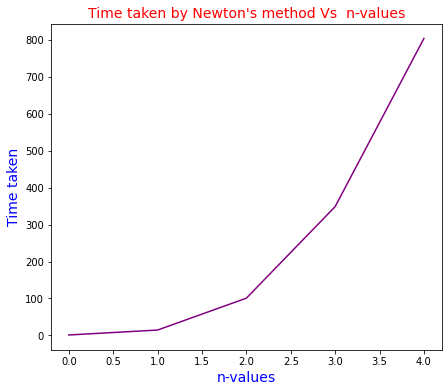

In [ ]:
#plotting the Time taken by Newton's method against n-value. 
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
plt.plot(elapsed_time, color='purple')
plt.xlabel('n-values',color='b', fontsize = 14)
plt.ylabel('Time taken',color='b', fontsize = 14)
plt.title("Time taken by Newton's method Vs  n-values", color='r', fontsize = 14)
plt.show()

**COMMENT:** \
From the above graph it is very clear that for increasing values of $n$, time taken by the $Newton's$ Method to find the minimizer also increases.